In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score

In [68]:
data = pd.read_csv("Placement_Data_Full_Class.csv")

In [69]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [70]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [71]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [73]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [74]:
data = data.drop("sl_no",axis=1)

In [75]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [76]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [77]:
data.shape

(215, 14)

In [78]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [79]:
data = data.drop("salary",axis=1)

In [80]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


<AxesSubplot:>

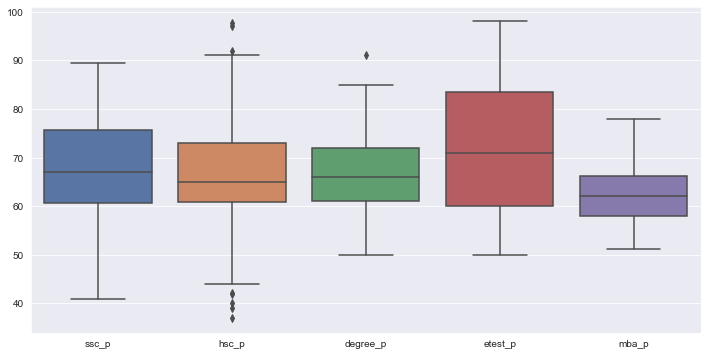

In [81]:
sns.boxplot(data=data)

In [82]:
q3 = data.hsc_p.quantile(0.75)

In [83]:
q1 = data.hsc_p.quantile(0.25)
IQR = q3-q1
li = q1-1.5*IQR
ul = q3+1.5*IQR
data1 = data[~((data.hsc_p>ul)| (data.hsc_p<li))]

<AxesSubplot:>

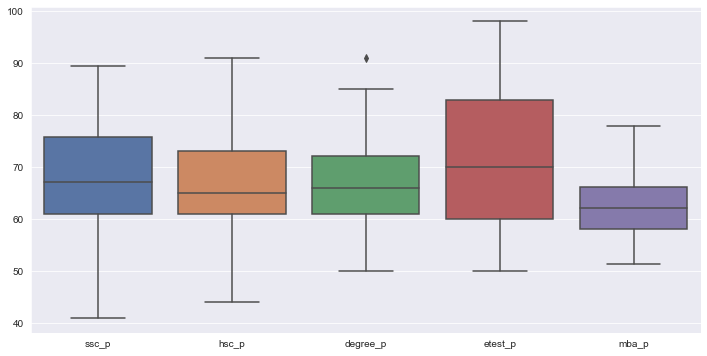

In [84]:
sns.boxplot(data=data1)

In [85]:
data1.shape

(207, 13)

<AxesSubplot:>

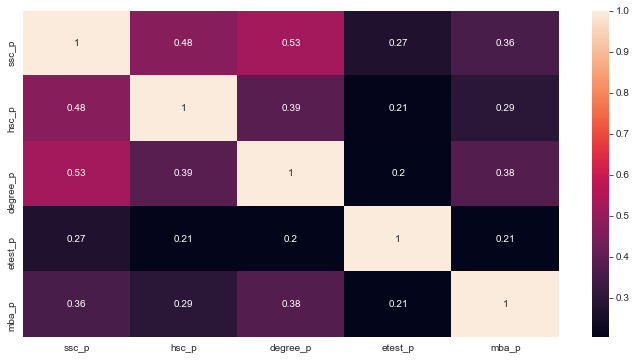

In [86]:
sns.heatmap(data1.corr(),annot=True)

In [87]:
data1.status.value_counts()

Placed        145
Not Placed     62
Name: status, dtype: int64

In [88]:
data1 = data1.drop("gender",axis=1)

In [89]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [90]:
data1.ssc_b.value_counts()

Central    113
Others      94
Name: ssc_b, dtype: int64

In [91]:
data1.ssc_b = data1.ssc_b.map({"Central":1,"Others":0})

In [92]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,1,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,1,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,1,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,58.00,0,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,67.00,0,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,74.00,0,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [93]:
data1.hsc_b.value_counts()

Others     125
Central     82
Name: hsc_b, dtype: int64

In [94]:
data1.hsc_b = data1.hsc_b.map({"Others":1,"Central":0})

In [95]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,0,91.00,1,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,1,78.33,1,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,1,68.00,0,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,1,52.00,0,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,1,73.60,0,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,1,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,58.00,0,60.00,1,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,67.00,0,67.00,1,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,74.00,0,66.00,1,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [96]:
data1.hsc_s.value_counts()

Commerce    111
Science      86
Arts         10
Name: hsc_s, dtype: int64

In [97]:
data1["hsc_s"] = data1["hsc_s"].map({"Commerce":1,"Science":2,"Arts":3})

In [98]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,0,91.00,1,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,1,78.33,1,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,1,68.00,0,3,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,1,52.00,0,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,1,73.60,0,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,1,1,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,58.00,0,60.00,1,2,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,67.00,0,67.00,1,1,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,74.00,0,66.00,1,1,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [99]:
data1.degree_t.value_counts()

Comm&Mgmt    141
Sci&Tech      57
Others         9
Name: degree_t, dtype: int64

In [100]:
data1.degree_t = data1.degree_t.map({"Comm&Mgmt":1,"Sci&Tech":2,"Others":3})

In [101]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,0,91.00,1,1,58.00,2,No,55.0,Mkt&HR,58.80,Placed
1,79.33,1,78.33,1,2,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,1,68.00,0,3,64.00,1,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,1,52.00,0,2,52.00,2,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,1,73.60,0,1,73.30,1,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,1,1,77.60,1,No,91.0,Mkt&Fin,74.49,Placed
211,58.00,0,60.00,1,2,72.00,2,No,74.0,Mkt&Fin,53.62,Placed
212,67.00,0,67.00,1,1,73.00,1,Yes,59.0,Mkt&Fin,69.72,Placed
213,74.00,0,66.00,1,1,58.00,1,No,70.0,Mkt&HR,60.23,Placed


In [102]:
data1.workex = data1.workex.map({"Yes":1,"No":2})

In [103]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,0,91.00,1,1,58.00,2,2,55.0,Mkt&HR,58.80,Placed
1,79.33,1,78.33,1,2,77.48,2,1,86.5,Mkt&Fin,66.28,Placed
2,65.00,1,68.00,0,3,64.00,1,2,75.0,Mkt&Fin,57.80,Placed
3,56.00,1,52.00,0,2,52.00,2,2,66.0,Mkt&HR,59.43,Not Placed
4,85.80,1,73.60,0,1,73.30,1,2,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,1,1,77.60,1,2,91.0,Mkt&Fin,74.49,Placed
211,58.00,0,60.00,1,2,72.00,2,2,74.0,Mkt&Fin,53.62,Placed
212,67.00,0,67.00,1,1,73.00,1,1,59.0,Mkt&Fin,69.72,Placed
213,74.00,0,66.00,1,1,58.00,1,2,70.0,Mkt&HR,60.23,Placed


In [104]:
data1.specialisation.value_counts()

Mkt&Fin    115
Mkt&HR      92
Name: specialisation, dtype: int64

In [105]:
data1.specialisation = data1.specialisation.map({"Mkt&Fin":1,"Mkt&HR":2})

In [106]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,0,91.00,1,1,58.00,2,2,55.0,2,58.80,Placed
1,79.33,1,78.33,1,2,77.48,2,1,86.5,1,66.28,Placed
2,65.00,1,68.00,0,3,64.00,1,2,75.0,1,57.80,Placed
3,56.00,1,52.00,0,2,52.00,2,2,66.0,2,59.43,Not Placed
4,85.80,1,73.60,0,1,73.30,1,2,96.8,1,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,1,1,77.60,1,2,91.0,1,74.49,Placed
211,58.00,0,60.00,1,2,72.00,2,2,74.0,1,53.62,Placed
212,67.00,0,67.00,1,1,73.00,1,1,59.0,1,69.72,Placed
213,74.00,0,66.00,1,1,58.00,1,2,70.0,2,60.23,Placed


In [107]:
data1.status = data1.status.map({"Placed":1,"Not Placed":2})

In [108]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,0,91.00,1,1,58.00,2,2,55.0,2,58.80,1
1,79.33,1,78.33,1,2,77.48,2,1,86.5,1,66.28,1
2,65.00,1,68.00,0,3,64.00,1,2,75.0,1,57.80,1
3,56.00,1,52.00,0,2,52.00,2,2,66.0,2,59.43,2
4,85.80,1,73.60,0,1,73.30,1,2,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,1,1,77.60,1,2,91.0,1,74.49,1
211,58.00,0,60.00,1,2,72.00,2,2,74.0,1,53.62,1
212,67.00,0,67.00,1,1,73.00,1,1,59.0,1,69.72,1
213,74.00,0,66.00,1,1,58.00,1,2,70.0,2,60.23,1


In [109]:
data1 = data1.drop("hsc_s",axis=1)

In [110]:
data1

,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,0,91.00,1,58.00,2,2,55.0,2,58.80,1
1,79.33,1,78.33,1,77.48,2,1,86.5,1,66.28,1
2,65.00,1,68.00,0,64.00,1,2,75.0,1,57.80,1
3,56.00,1,52.00,0,52.00,2,2,66.0,2,59.43,2
4,85.80,1,73.60,0,73.30,1,2,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,0,82.00,1,77.60,1,2,91.0,1,74.49,1
211,58.00,0,60.00,1,72.00,2,2,74.0,1,53.62,1
212,67.00,0,67.00,1,73.00,1,1,59.0,1,69.72,1
213,74.00,0,66.00,1,58.00,1,2,70.0,2,60.23,1


<AxesSubplot:>

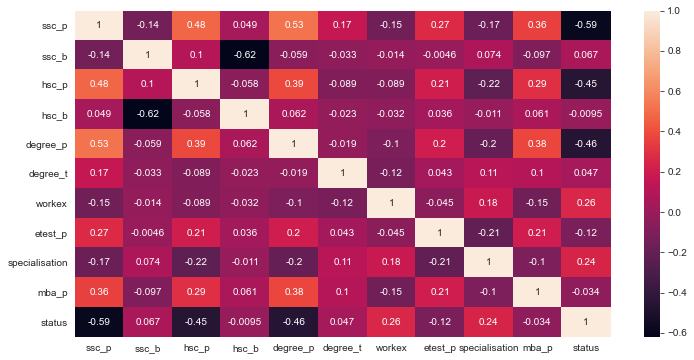

In [111]:
sns.set({"figure.figsize":(12,6)})
sns.heatmap(data1.corr(),annot=True)

In [112]:
data1.columns

Index(['ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [113]:
X = data1[["ssc_p","hsc_p","degree_p","workex","etest_p","specialisation"]]

In [114]:
y = data1.status

In [115]:
X

,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation
0,67.00,91.00,58.00,2,55.0,2
1,79.33,78.33,77.48,1,86.5,1
2,65.00,68.00,64.00,2,75.0,1
3,56.00,52.00,52.00,2,66.0,2
4,85.80,73.60,73.30,2,96.8,1
...,...,...,...,...,...,...
210,80.60,82.00,77.60,2,91.0,1
211,58.00,60.00,72.00,2,74.0,1
212,67.00,67.00,73.00,1,59.0,1
213,74.00,66.00,58.00,2,70.0,2


In [116]:
y

0      1
1      1
2      1
3      2
4      1
      ..
210    1
211    1
212    1
213    1
214    2
Name: status, Length: 207, dtype: int64

In [117]:
from imblearn.over_sampling import RandomOverSampler

In [118]:
rm = RandomOverSampler()

In [119]:
X1,y1 = rm.fit_resample(X,y)

In [120]:
X1.value_counts().sum()

290

In [121]:
y1.value_counts().sum()

290

In [122]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=True)

In [123]:
lr = LogisticRegression()

In [124]:
model = lr.fit(X1_train,y1_train)

In [125]:
y1_pred = model.predict(X1_test)

In [126]:
y1_pred

array([1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1],
      dtype=int64)

In [127]:
confusion_matrix(y1_pred,y1_test)

array([[37,  4],
       [ 4, 42]], dtype=int64)

In [128]:
accuracy_score(y1_pred,y1_test)

0.9080459770114943

In [129]:
precision_score(y1_pred,y1_test)

0.9024390243902439

In [130]:
print(classification_report(y1_pred,y1_test))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        41
           2       0.91      0.91      0.91        46

    accuracy                           0.91        87
   macro avg       0.91      0.91      0.91        87
weighted avg       0.91      0.91      0.91        87



In [131]:
import pickle as pk

In [132]:
pk.dump(model,open('Place_Model.sav','wb'))